By Juliencs
This again uses the same housing data but it is approached from a different perspective

Introduction

This kernel is an attempt to use every trick in the books to unleash the full power of Linear Regression, including a lot of preprocessing and a look at several Regularization algorithms.

At the time of writing, it achieves a score of about 0.121 on the public LB, just using regression, no RF, no xgboost, no ensembling etc. All comments/corrections are more than welcome.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Definitions
pd.set_option("display.float_format",lambda x:'%.3f'%x)
%matplotlib inline 
# njobs=4

In [5]:
#Get data 
train=pd.read_csv("../Python EDA/train.csv")
print("train:" +str(train.shape))

train:(1460, 81)


In [7]:
#Check for duplicates 
idsUnique=len(set(train.Id))
idsTotal=train.shape[0]
idsUnique

1460

In [8]:
idsTotal

1460

In [9]:
idsDupli=idsTotal-idsUnique
print("There are"+ str(idsDupli)+" duplicate ids for" + str(idsTotal)+"total entries")

There are0 duplicate ids for1460total entries


In [11]:
#Drop Id column
train.drop("Id", axis=1,inplace=True)

# Preprocessing


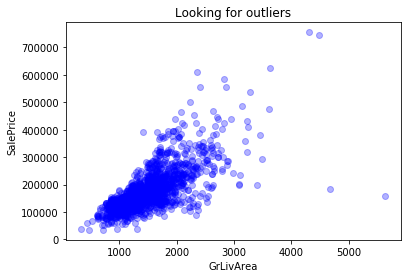

In [15]:
#Looking for outliers
plt.scatter(train.GrLivArea,train.SalePrice,c="blue",alpha=0.3);
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [16]:
#From looking at the plot itself, we can just eyeball the cut off for outliers
train=train[train.GrLivArea<4000]

In [19]:
#Log transform the target for official scoring
train.SalePrice=np.log1p(train.SalePrice)
y=train.SalePrice

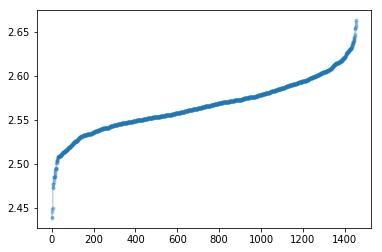

In [37]:
#Looking at the distribution after log transformation
x=np.arange(len(y))
y1=pd.DataFrame(y).sort_values(by="SalePrice")
plt.plot(x,y1,alpha=0.3,marker=".");

Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally